In [1]:
from fit_util import *
from omega_a_fitting import *
from pileup_correction import *
from lost_muon_calculation import *

Welcome to JupyROOT 6.12/06


In [16]:
#f = r.TFile("../truncationTest/data/results_1MissingFile_FullVsTrunc.root")
f = r.TFile("./PileupCorrection_TcOver6Binning_FullIslands_2019_07_17.root")
f.ls()

TFile**		./PileupCorrection_TcOver6Binning_FullIslands_2019_07_17.root	
 TFile*		./PileupCorrection_TcOver6Binning_FullIslands_2019_07_17.root	
  KEY: TTree	t;7	Variable Tree
  KEY: TTree	t;6	Variable Tree
  KEY: TTree	t;5	Variable Tree
  KEY: TTree	t;4	Variable Tree
  KEY: TTree	t;3	Variable Tree
  KEY: TTree	t;2	Variable Tree
  KEY: TTree	t;1	Variable Tree
  KEY: TH2D	h;4	clusters yx projection
  KEY: TH2D	h;3	clusters yx projection
  KEY: TH2D	h;2	clusters yx projection
  KEY: TH2D	h;1	clusters yx projection
  KEY: TH1D	h_y;1	clusters yx projection
  KEY: TNamed	name;1	6binning
  KEY: TH2D	rhoDouble;1	clusters yx projection
  KEY: TH2D	doublePileup;4	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;3	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;2	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;1	Double Pileup [Unscaled]
  KEY: TH1D	doublePileupY;1	Double Pileup [Unscaled]
  KEY: TH2D	h_doublePileupCorrected;2	clusters yx projection
  KEY: TH2D	h_doublePileupCorrected;1	clust

In [17]:
clusters = f.Get("h_doublePileupCorrected").Clone("clusters")
clusters.Rebin2D(6,1)

<ROOT.TH2D object ("clusters") at 0x7fffd51dcc40>

Info in <TCanvas::Print>: eps file /mnt/c/Users/jlabo/Google Drive/Research/Conferences/oSTEM 2019/figures/positronSpectrum_2D.eps has been created


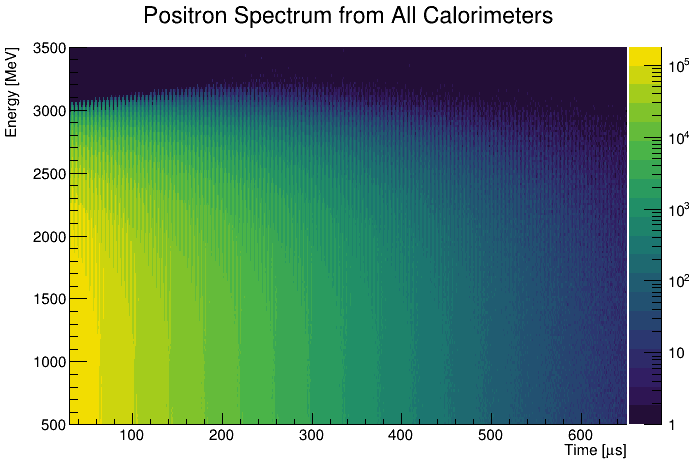

In [28]:
c = r.TCanvas()
r.gStyle.SetOptStat(0)
r.gStyle.SetPalette(112)
r.gStyle.SetNumberContours(80)
clusters.SetTitle("Positron Spectrum from All Calorimeters; Time [#mus]; Energy [MeV]")
clusters.Draw("colz")
clusters.GetYaxis().SetRangeUser(500,3500)
clusters.GetXaxis().SetRangeUser(30,650)
c.SetLogz()
c.Draw()
c.Print("/mnt/c/Users/jlabo/Google Drive/Research/Conferences/oSTEM 2019/figures/positronSpectrum_2D.eps")

In [39]:
e1 = 1710
e2 = 6000
calo = 0

#wiggle = MakeWiggleFromTH3(clusters, e1, e2, calo)
wiggle = MakeWiggleFromTH2(clusters, e1, e2, calo, 1, True)
#wiggle = MakeWiggleFromTH1(clusters, e1, e2, calo, 1, True)

In [40]:
DumpClass(wiggle)

Dumping:  <omega_a_fitting.MakeWiggleFromTH2 object at 0x7f67347efb38>
Class:  <class 'omega_a_fitting.MakeWiggleFromTH2'>
    elow = 1710
    ehigh = 6000
    timeScaleFactor = 1
    caloNum = 0
    isPileupCorrected = True
    BinOrEnergy = energy
    ebinlow = 86
    ebinhigh = 301
    title = Wiggle Plot for [1710 < E (MeV) < 6000] in Calo 0
    h = <ROOT.TH1D object ("wiggle_1710_6000_0") at 0x7ffff2c2fea0>


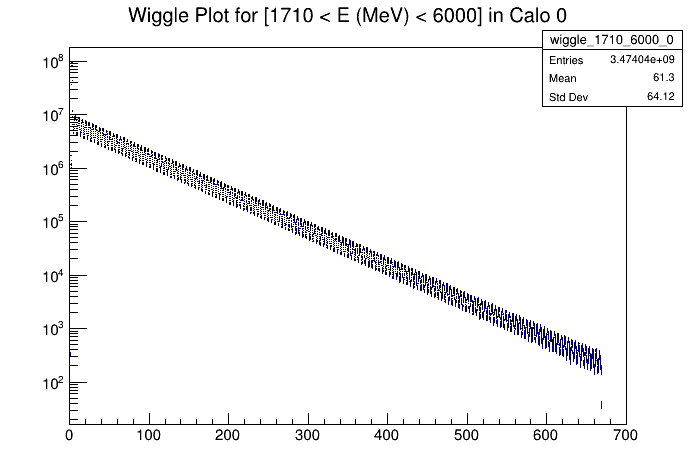

In [41]:
c = r.TCanvas()
wiggle.h.Draw()
c.SetLogy()
c.Draw()

---

### Now fit the wiggle plot

In [42]:
fitFunc = WiggleFit(GetBlindingPhrase("./blinding.txt"), "5par")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [43]:
DumpClass(fitFunc)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7f67347ef278>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7f67347ef940>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7f67347ef278>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7f67347ef278>>, '13par_changing': <bound method WiggleFit.blinded_wiggle_changing_cbo of <omega_a_fitting.WiggleFit object at 0x7f67347ef278>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7f67347ef278>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7f67347ef278>>, '23par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss_changingCBO of <omega_a_fitting.WiggleFit object at 0x7f67347ef278>>, 'custom': <bound method WiggleFit.defineCustomFunction of <omega_a_fitting.WiggleFit 

In [44]:
fitFunc([0],[2+x for x in range(18)])

-5.681362293202928

In [45]:
fit = BuildTF1(fitFunc, 5, "5par", "five_parameter_fit", 30, 650)
fit.SetParameters([7000000,64.4,0.33,-33,0])
fit.SetParNames()

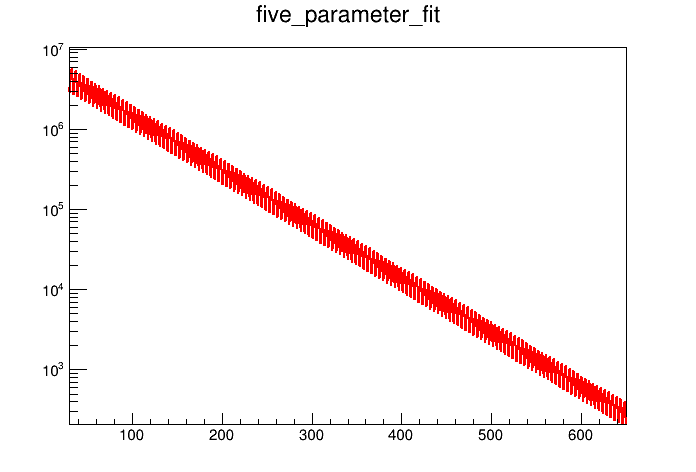

In [46]:
c = r.TCanvas()
fit.f.Draw()
c.SetLogy()
c.Draw()

In [47]:
fitter = WiggleFitter(wiggle.h, fit, "5par", "REMB", 1)

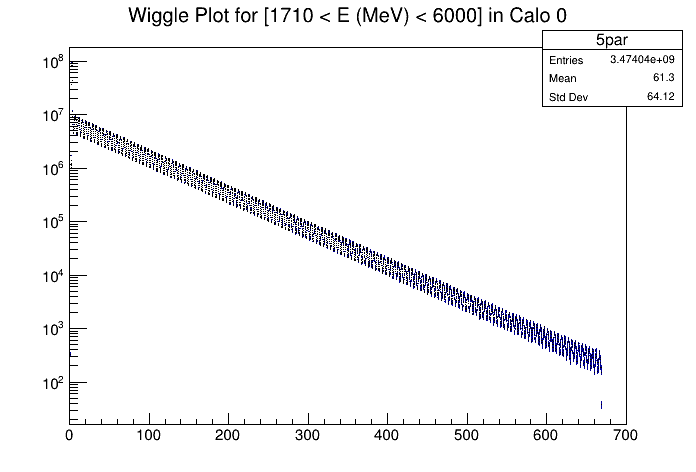

In [48]:
c = r.TCanvas()
#fitter.f.Draw()
fitter.h.Draw("")
c.SetLogy()
c.Draw()

In [49]:
fitter.Fit(2)

Starting fit 1 / 1
Parameters from this fit: 
     ChiSq/NDF =  16761.414543575007 / 4151 = 4.037922077469286
      N  =  7686759.993682593 +/- 300.63797533710454
      #tau_{#mu}  =  64.56991003391808 +/- 0.0014191512317923173
      A  =  0.3743928894387726 +/- 2.934849248007944e-05
      R  =  -48.331597484069945 +/- 0.875556864081913
      #phi_{a}  =  -1.060499358605886 +/- 0.00014384862192325912
 FCN=16761.4 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         388 TOTAL
                     EDM=2.31577e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            7.68676e+06   3.00638e+02  -3.49558e-03  -1.49845e-11
   2  #tau_{#mu}   6.45699e+01   1.41915e-03  -1.12732e-08   1.18979e-06
   3  A            3.74393e-01   2.93485e-05  -1.11117e-09  -6.86386e-06
   4  R           -4.83316e+01   8.75557e-01  -2.65125e-06  -4.79065e-08
   

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [50]:
fitter.ComputeFFT()

Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


In [51]:
DumpClass(fitter)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f67347efd68>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("5par") at 0x7ffff3039f90>
    f = <ROOT.TF1 object ("5par_fitter") at 0x7ffff2ea0180>
    name = 5par_fitter
    nPar = 5
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7686759.993682593, 64.56991003391808, 0.3743928894387726, -48.331597484069945, -1.060499358605886]]
    intermediateErrors = [[300.63797533710454, 0.0014191512317923173, 2.934849248007944e-05, 0.875556864081913, 0.00014384862192325912]]
    intermediateChi2 = [4.037922077469286]
    pt = <ROOT.TPaveText object ("TPave") at 0x7ffff3038e00>
    resid = <ROOT.TH1D object ("h_resid_5par_fitter") at 0x7ffff304c8c0>
    fft = <ROOT.TH1D object ("out_MAG P") at 0x7ffff30301b0>


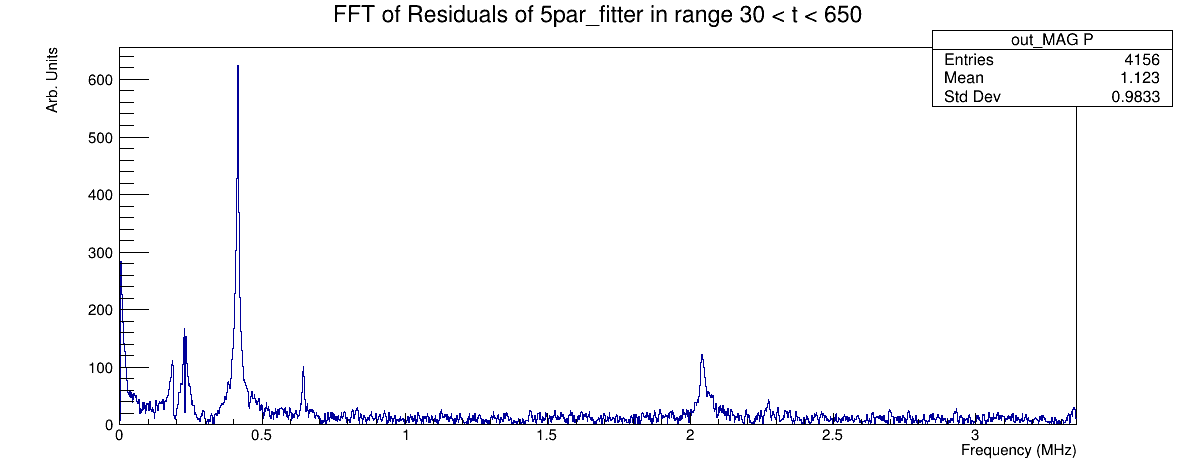

In [52]:
c = r.TCanvas("c","c",1200,500)
fitter.fft.Draw("hist")
#c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


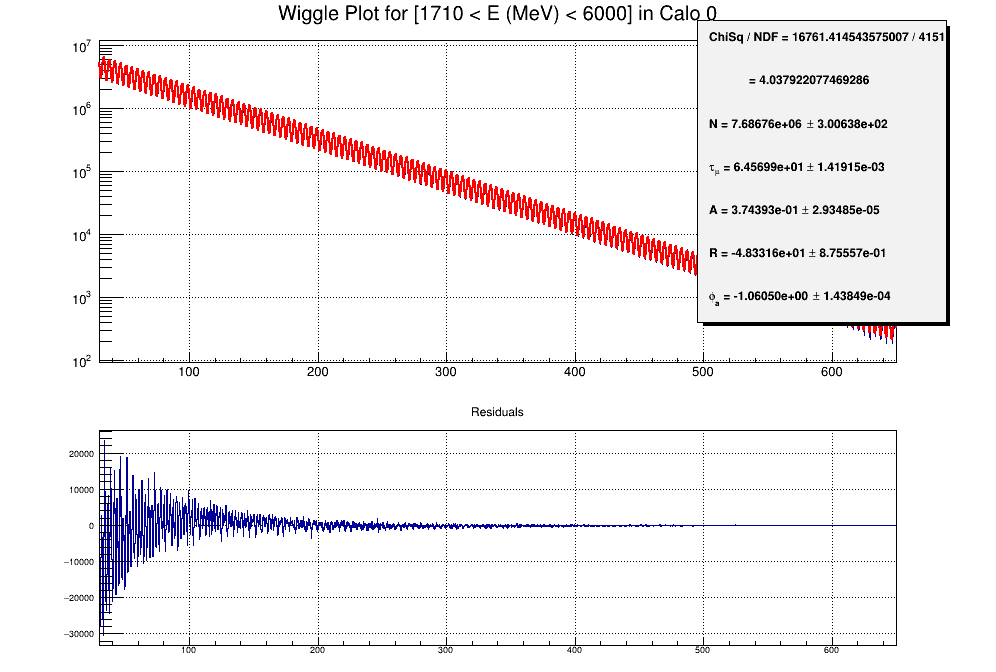

In [53]:
c = fitter.Draw()